In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc

In [268]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select b.description, c.description from DatixCRM.dbo.code_unit b join DatixCRM.dbo.incidents_main a on a.inc_unit = b.code join DatixCRM.dbo.code_locactual c on a.inc_locactual = c.code where a.inc_type='PAT' and a.inc_category='MEDIC' and a.inc_organisation='QA' and c.cod_parent2='QA'"
df = pd.read_sql(query, sql_conn)
df.columns = ['division-care_group','location']
df.head()

,division-care_group,location
0,"Clinical Delivery Division - Critical Care, Th...",Department of Critical Care (E5) (DCCQ)
1,"Clinical Delivery Division - Critical Care, Th...",Department of Critical Care (E5) (DCCQ)
2,"Clinical Delivery Division - Critical Care, Th...",Theatres QA
3,"Clinical Delivery Division - Critical Care, Th...",Department of Critical Care (E5) (DCCQ)
4,"Clinical Delivery Division - Critical Care, Th...",Department of Critical Care (E5) (DCCQ)


In [301]:
df['division-care_group'] = df['division-care_group'].str.replace(' and ',' & ')
divider = df['division-care_group'].str.split(" Division - ",n=1,expand=True)
df['division'] = divider[0]
df['care_group'] = divider[1]
#df['division'] = df['division'].str.replace(' and ',' & ')
df.loc[df.division == 'Corporate Functions', 'care_group'] = 'Corporate Functions'
df = df[df['division-care_group'] != 'Corporate Functions']
df = df[df.care_group != 'Pathology']
#df.loc[df.division == 'Surgical & Outpatients', 'division'] = 'Surgical & Outpatients + Corporate Functions'
#df.loc[df.division == 'Corporate Functions', 'division'] = 'Surgical & Outpatients + Corporate Functions'

In [302]:
division_counts = df['division'].value_counts()
division_percentages = 100*division_counts/sum(division_counts.values)
division_labels = [str(i) for i in division_counts.index]
print(division_percentages)

Medicine & Urgent Care    45.625000
Networked Services        20.729167
Clinical Delivery         16.863426
Surgical & Outpatients    16.782407
Name: division, dtype: float64


In [303]:
df['division_sorted'] = pd.Categorical(df['division'], division_labels)
df = df.sort_values("division_sorted")
df.head()

,division-care_group,location,division,care_group,division_sorted,care_group_sorted,care_group-location,location_sorted
4340,Medicine & Urgent Care Division - Urgent Care,AMU,Medicine & Urgent Care,Urgent Care,Medicine & Urgent Care,Urgent Care,Urgent Care - AMU,Urgent Care - AMU
1705,Medicine & Urgent Care Division - Medicine,D3,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine,Medicine - D3,Medicine - D3
1708,Medicine & Urgent Care Division - Medicine,D3,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine,Medicine - D3,Medicine - D3
1717,Medicine & Urgent Care Division - Medicine,D3,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine,Medicine - D3,Medicine - D3
1719,Medicine & Urgent Care Division - Medicine,D3,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine,Medicine - D3,Medicine - D3


In [304]:
df_medicine = df[df.division == 'Medicine & Urgent Care']
df_medicine.head()
medicine_counts = df_medicine['care_group'].value_counts()
medicine_labels = [str(i) for i in medicine_counts.index]
print(medicine_labels)

['Urgent Care', 'Medicine', 'Older Persons Medicine']


In [305]:
df_networked = df[df.division == 'Networked Services']
df_networked.head()
networked_counts = df_networked['care_group'].value_counts()
networked_labels = [str(i) for i in networked_counts.index]
print(networked_labels)

["Women & Children's", 'Regional Cancer Centre', 'Renal & Transplantation']


In [306]:
df_clinical = df[df.division == 'Clinical Delivery']
df_clinical.head()
clinical_counts = df_clinical['care_group'].value_counts()
clinical_labels = [str(i) for i in clinical_counts.index]
print(clinical_labels)

['Pharmacy', 'Critical Care, Theatres, Anaesthetics & HSDU', 'Imaging Radiology']


In [307]:
df_surgical = df[df.division == 'Surgical & Outpatients']
df_surgical.head()
surgical_counts = df_surgical['care_group'].value_counts()
surgical_labels = [str(i) for i in surgical_counts.index]
print(surgical_labels)

['MSK / Head & Neck', 'Surgery']


In [308]:
care_group_labels = medicine_labels + networked_labels + clinical_labels + surgical_labels
print(care_group_labels)

['Urgent Care', 'Medicine', 'Older Persons Medicine', "Women & Children's", 'Regional Cancer Centre', 'Renal & Transplantation', 'Pharmacy', 'Critical Care, Theatres, Anaesthetics & HSDU', 'Imaging Radiology', 'MSK / Head & Neck', 'Surgery']


In [309]:
df['care_group_sorted'] = pd.Categorical(df['care_group'], care_group_labels)
df = df.sort_values(['division_sorted','care_group_sorted'])
df.head()

,division-care_group,location,division,care_group,division_sorted,care_group_sorted,care_group-location,location_sorted
4340,Medicine & Urgent Care Division - Urgent Care,AMU,Medicine & Urgent Care,Urgent Care,Medicine & Urgent Care,Urgent Care,Urgent Care - AMU,Urgent Care - AMU
3848,Medicine & Urgent Care Division - Urgent Care,AMU,Medicine & Urgent Care,Urgent Care,Medicine & Urgent Care,Urgent Care,Urgent Care - AMU,Urgent Care - AMU
3846,Medicine & Urgent Care Division - Urgent Care,AMU,Medicine & Urgent Care,Urgent Care,Medicine & Urgent Care,Urgent Care,Urgent Care - AMU,Urgent Care - AMU
3845,Medicine & Urgent Care Division - Urgent Care,AMU,Medicine & Urgent Care,Urgent Care,Medicine & Urgent Care,Urgent Care,Urgent Care - AMU,Urgent Care - AMU
3844,Medicine & Urgent Care Division - Urgent Care,AMU,Medicine & Urgent Care,Urgent Care,Medicine & Urgent Care,Urgent Care,Urgent Care - AMU,Urgent Care - AMU


In [310]:
care_group_counts = df['care_group'].value_counts()[df['care_group'].unique()]
care_group_percentages = 100*care_group_counts/sum(care_group_counts.values)
print(care_group_percentages)

Urgent Care                                     18.969907
Medicine                                        17.743056
Older Persons Medicine                           8.912037
Women & Children's                              10.115741
Regional Cancer Centre                           7.083333
Renal & Transplantation                          3.530093
Pharmacy                                        11.666667
Critical Care, Theatres, Anaesthetics & HSDU     4.282407
Imaging Radiology                                0.914352
MSK / Head & Neck                                9.386574
Surgery                                          7.395833
Name: care_group, dtype: float64


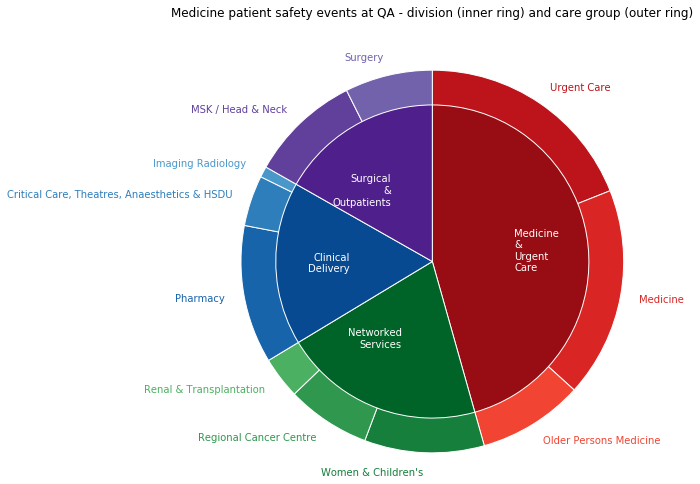

In [311]:
# Create colors
a, b, c, d, e =[plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]
a, c, d, e = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]

# First Ring (Inside)
fig, ax = plt.subplots()
ax.axis('equal')
division_labels_newlines = [i.replace(' ','\n') for i in division_labels]
#mypie, _ = ax.pie(division_counts, radius=2, labels=division_labels_newlines, labeldistance=0.6, colors=[a(0.9), b(0.9), c(0.9), d(0.9), e(0.9)], textprops={'color':'w'})
mypie, _ = ax.pie(division_counts, radius=1.9, labels=division_labels_newlines, labeldistance=0.5, colors=[a(0.9), c(0.9), d(0.9), e(0.9)], textprops={'color':'w'}, startangle=90, counterclock=False)
plt.setp( mypie, width=1.9, edgecolor='white')
 
# Second Ring (oUTside)
#care_group_colours = [a(0.8), a(0.7), a(0.6), a(0.5), b(0.8), c(0.8), c(0.7), c(0.6), d(0.8), d(0.7), d(0.6), e(0.8), e(0.7), e(0.6)]
care_group_colours = [a(0.8), a(0.7), a(0.6), c(0.8), c(0.7), c(0.6), d(0.8), d(0.7), d(0.6), e(0.8), e(0.7), e(0.6)]
mypie2, texts = ax.pie(care_group_counts, radius=2.2, labels=care_group_labels, colors=care_group_colours, startangle=90, counterclock=False)
plt.setp( mypie2, width=0.4, edgecolor='white')
for text, color in zip(texts, care_group_colours):
    text.set_color(color)
plt.margins(0,0)

plt.title('Medicine patient safety events at QA - division (inner ring) and care group (outer ring)', y=1.6);

In [312]:
df.loc[df.location == 'Department of Critical Care (E5) (DCCQ)', 'location'] = 'E5'
df.loc[df.location == 'Acute Medical Unit (AMU) (MAU)', 'location'] = 'AMU'
df.loc[df.location == 'Haematology & Oncology Day Unit (HODU)', 'location'] = 'HODU'
df.loc[df.location == 'Childrens Assesment Unit (CAU)', 'location'] = 'CAU'
df.loc[df.location == 'Hepatology Clinic (Nurse led) (on C5)', 'location'] = 'Hepatology'
df.loc[df.location == 'Cardiac Day Unit (CDU)', 'location'] = 'CDU'
df.loc[df.location == 'Surgical Assessment Unit (SAU)', 'location'] = 'SAU'
df.location = df.location.str.replace(' QA','')
df.location = df.location.str.replace(' Department','')
df.location = df.location.str.replace(' Unit','')
df.location = df.location.str.replace(' Centre','')
df.location = df.location.str.replace(' Clinic','')
df.location = df.location.str.replace(' and ',' & ')
df.loc[df.location == 'Theatre Admissions Suite (TAS)', 'location'] = 'TAS'
df.loc[df.location == 'Pre-Operative Assessment (POA)', 'location'] = 'POA'
df.loc[df.location == 'Theatre - D1', 'location'] = 'D1'
df.loc[df.location == 'Research & Development', 'location'] = 'R&D'
df.loc[df.location == 'Reception (Atrium)', 'location'] = 'Reception'
df.loc[df.location == 'G5 Endoscopy Suites', 'location'] = 'G5'
df.loc[df.location == 'F3 Stroke Rehabilitation', 'location'] = 'F3'
df.loc[df.location == 'F4 Acute Stroke Ward', 'location'] = 'F4'
df.loc[df.location == 'F1  Neuro Rehab', 'location'] = 'F1'
df.loc[df.location == 'Emergency (ED)', 'location'] = 'ED'
df.loc[df.location == 'B6  Antenatal Ward', 'location'] = 'B6'
df.loc[df.location == 'B7 Postnatal Ward', 'location'] = 'B7'
df.loc[df.location == 'B9 NICU', 'location'] = 'B9'
df.loc[df.location == 'A7 Starfish', 'location'] = 'A7'
df.loc[df.location == 'A8 Shipwreck', 'location'] = 'A8'
df.loc[df.location == 'B5  - Mary Rose Ward', 'location'] = 'B5'
df.loc[df.location == 'B8 Labour Ward', 'location'] = 'B8'
df.loc[df.location == 'Radiotherapy  Dept within CHOC', 'location'] = 'Radiotherapy'
df.loc[df.location == 'Surgical High Care (SHCU)', 'location'] = 'SHCU'

In [313]:
location_counts = df['location'].value_counts()[df['location'].unique()]
print(location_counts.index)

Index(['AMU', 'ED', 'D2', 'Observation Ward', 'Emergency (Paediatrics)', 'D3',
       'E8', 'E6/7', 'C7', 'C5', 'C6', 'Respiratory Day',
       'Cardiology Outpatients', 'Endoscopy D Level', 'CDU',
       'Cardiac Catheter Laboratory', 'Hepatology', 'Diabetes & Endocrinology',
       'Gastroenterology  Outpatients', 'G5', 'D7', 'G3', 'G4', 'G1', 'F2',
       'G2', 'F1', 'TIA', 'F3', 'F4', 'B7', 'A7', 'B9', 'A8', 'B6', 'CAU',
       'A5/6', 'Antenatal', 'Gynae Outpatients', 'Maternity Theatres',
       'Paediatric', 'Maternity Assessment', 'Maternity Services',
       'Administration Offices Women & Children's',
       'Early Pregnancy Assessment', 'B5', 'B8', 'F6', 'F5', 'F7', 'HODU',
       'Anti Coagulation', 'Oncology Outpatients', 'Radiotherapy',
       'Acute Oncology Service', 'Haematology Outpatients', 'G9', 'G6', 'G7',
       'Haemodialysis', 'Renal Day ', 'Peritoneal Dialysis',
       'Administration Offices Renal & Transplant', 'Transplant & Retrieval ',
       'Renal Outpati

In [314]:
df_urgent = df[df.care_group == 'Urgent Care']
df_urgent.head()
urgent_counts = df_urgent['location'].value_counts()
urgent_labels = ['Urgent Care - ' + str(i) for i in urgent_counts.index]
print(urgent_labels)

['Urgent Care - AMU', 'Urgent Care - ED', 'Urgent Care - Emergency (Paediatrics)', 'Urgent Care - D2', 'Urgent Care - Observation Ward']


In [315]:
df_medicine = df[df.care_group == 'Medicine']
df_medicine.head()
medicine_counts = df_medicine['location'].value_counts()
medicine_labels = ['Medicine - ' + str(i) for i in medicine_counts.index]
print(medicine_labels)

['Medicine - C6', 'Medicine - D2', 'Medicine - C5', 'Medicine - E8', 'Medicine - D3', 'Medicine - E6/7', 'Medicine - C7', 'Medicine - D7', 'Medicine - CDU', 'Medicine - Endoscopy D Level', 'Medicine - Respiratory Day', 'Medicine - Cardiology Outpatients', 'Medicine - Cardiac Catheter Laboratory', 'Medicine - Diabetes & Endocrinology', 'Medicine - Gastroenterology  Outpatients', 'Medicine - G5', 'Medicine - Hepatology']


In [316]:
df_older = df[df.care_group == 'Older Persons Medicine']
df_older.head()
older_counts = df_older['location'].value_counts()
older_labels = ['Older Persons Medicine - ' + str(i) for i in older_counts.index]
print(older_labels)

['Older Persons Medicine - F4', 'Older Persons Medicine - F2', 'Older Persons Medicine - G1', 'Older Persons Medicine - G3', 'Older Persons Medicine - G4', 'Older Persons Medicine - F3', 'Older Persons Medicine - G2', 'Older Persons Medicine - F1', 'Older Persons Medicine - TIA']


In [317]:
df_women = df[df.care_group == "Women & Children's"]
df_women.head()
women_counts = df_women['location'].value_counts()
women_labels = ["Women & Children's - " + str(i) for i in women_counts.index]
print(women_labels)

["Women & Children's - B9", "Women & Children's - A7", "Women & Children's - B7", "Women & Children's - B8", "Women & Children's - A5/6", "Women & Children's - B6", "Women & Children's - A8", "Women & Children's - CAU", "Women & Children's - B5", "Women & Children's - Maternity Assessment", "Women & Children's - Paediatric", "Women & Children's - Maternity Theatres", "Women & Children's - Gynae Outpatients", "Women & Children's - Antenatal", "Women & Children's - Maternity Services", "Women & Children's - Early Pregnancy Assessment", "Women & Children's - Administration Offices Women & Children's"]


In [318]:
df_regional = df[df.care_group == "Regional Cancer Centre"]
df_regional.head()
regional_counts = df_regional['location'].value_counts()
regional_labels = ['Regional Cancer Centre - ' + str(i) for i in regional_counts.index]
print(regional_labels)

['Regional Cancer Centre - HODU', 'Regional Cancer Centre - F6', 'Regional Cancer Centre - F5', 'Regional Cancer Centre - F7', 'Regional Cancer Centre - Anti Coagulation', 'Regional Cancer Centre - Oncology Outpatients', 'Regional Cancer Centre - Acute Oncology Service', 'Regional Cancer Centre - Radiotherapy', 'Regional Cancer Centre - Haematology Outpatients']


In [319]:
df_renal = df[df.care_group == "Renal & Transplantation"]
df_renal.head()
renal_counts = df_renal['location'].value_counts()
renal_labels = ['Renal & Transplantation - ' + str(i) for i in renal_counts.index]
print(renal_labels)

['Renal & Transplantation - G7', 'Renal & Transplantation - G9', 'Renal & Transplantation - G6', 'Renal & Transplantation - Renal Day ', 'Renal & Transplantation - Haemodialysis', 'Renal & Transplantation - Renal Outpatients', 'Renal & Transplantation - Transplant & Retrieval ', 'Renal & Transplantation - Administration Offices Renal & Transplant', 'Renal & Transplantation - Peritoneal Dialysis']


In [320]:
df_pharmacy = df[df.care_group == "Pharmacy"]
df_pharmacy.head()
pharmacy_counts = df_pharmacy['location'].value_counts()
pharmacy_labels = ['Pharmacy - ' + str(i) for i in pharmacy_counts.index]
print(pharmacy_labels)

['Pharmacy - Pharmacy']


In [321]:
df_Critical = df[df.care_group == "Critical Care, Theatres, Anaesthetics & HSDU"]
df_Critical.head()
Critical_counts = df_Critical['location'].value_counts()
Critical_labels = ['Critical Care, Theatres, Anaesthetics & HSDU - ' + str(i) for i in Critical_counts.index]
print(Critical_labels)

['Critical Care, Theatres, Anaesthetics & HSDU - E5', 'Critical Care, Theatres, Anaesthetics & HSDU - Theatres', 'Critical Care, Theatres, Anaesthetics & HSDU - Day Surgery', 'Critical Care, Theatres, Anaesthetics & HSDU - Anaesthetics', 'Critical Care, Theatres, Anaesthetics & HSDU - POA', 'Critical Care, Theatres, Anaesthetics & HSDU - TAS', 'Critical Care, Theatres, Anaesthetics & HSDU - D1']


In [322]:
df_imaging = df[df.care_group == "Imaging Radiology"]
df_imaging.head()
imaging_counts = df_imaging['location'].value_counts()
imaging_labels = ['Imaging Radiology - ' + str(i) for i in imaging_counts.index]
print(imaging_labels)

['Imaging Radiology - Diagnostic Imaging', 'Imaging Radiology - Medical Physics']


In [323]:
df_msk = df[df.care_group == "MSK / Head & Neck"]
df_msk.head()
msk_counts = df_msk['location'].value_counts()
msk_labels = ['MSK / Head & Neck - ' + str(i) for i in msk_counts.index]
print(msk_labels)

['MSK / Head & Neck - D8', 'MSK / Head & Neck - Rheumatology Outpatients', 'MSK / Head & Neck - D1', 'MSK / Head & Neck - D5', 'MSK / Head & Neck - D6', 'MSK / Head & Neck - D4', 'MSK / Head & Neck - Eye Day Case', 'MSK / Head & Neck - QA@ Home MSK', 'MSK / Head & Neck - QA@ Home Head & Neck', 'MSK / Head & Neck - Ophthalmology Outpatients', 'MSK / Head & Neck - ENT Outpatients', 'MSK / Head & Neck - Ophthalmology Eye Emergency', 'MSK / Head & Neck - Orthopaedic Pre Operation', 'MSK / Head & Neck - Maxillofacial Outpatients']


In [324]:
df_surgery = df[df.care_group == "Surgery"]
df_surgery.head()
surgery_counts = df_surgery['location'].value_counts()
surgery_labels = ['Surgery - ' + str(i) for i in surgery_counts.index]
print(surgery_labels)

['Surgery - SAU', 'Surgery - E3', 'Surgery - E2', 'Surgery - D7', 'Surgery - SHCU', 'Surgery - Colorectal Outpatients']


In [325]:
location_labels = urgent_labels + medicine_labels + older_labels + women_labels + regional_labels + renal_labels + pharmacy_labels + Critical_labels + imaging_labels + msk_labels + surgery_labels
print(location_labels)

['Urgent Care - AMU', 'Urgent Care - ED', 'Urgent Care - Emergency (Paediatrics)', 'Urgent Care - D2', 'Urgent Care - Observation Ward', 'Medicine - C6', 'Medicine - D2', 'Medicine - C5', 'Medicine - E8', 'Medicine - D3', 'Medicine - E6/7', 'Medicine - C7', 'Medicine - D7', 'Medicine - CDU', 'Medicine - Endoscopy D Level', 'Medicine - Respiratory Day', 'Medicine - Cardiology Outpatients', 'Medicine - Cardiac Catheter Laboratory', 'Medicine - Diabetes & Endocrinology', 'Medicine - Gastroenterology  Outpatients', 'Medicine - G5', 'Medicine - Hepatology', 'Older Persons Medicine - F4', 'Older Persons Medicine - F2', 'Older Persons Medicine - G1', 'Older Persons Medicine - G3', 'Older Persons Medicine - G4', 'Older Persons Medicine - F3', 'Older Persons Medicine - G2', 'Older Persons Medicine - F1', 'Older Persons Medicine - TIA', "Women & Children's - B9", "Women & Children's - A7", "Women & Children's - B7", "Women & Children's - B8", "Women & Children's - A5/6", "Women & Children's - B6

In [326]:
df['care_group-location'] = df['care_group'] + ' - ' + df['location']
df['location_sorted'] = pd.Categorical(df['care_group-location'], location_labels)
df = df.sort_values(['division_sorted','care_group_sorted','location_sorted'])
df.head()

,division-care_group,location,division,care_group,division_sorted,care_group_sorted,care_group-location,location_sorted
4340,Medicine & Urgent Care Division - Urgent Care,AMU,Medicine & Urgent Care,Urgent Care,Medicine & Urgent Care,Urgent Care,Urgent Care - AMU,Urgent Care - AMU
3848,Medicine & Urgent Care Division - Urgent Care,AMU,Medicine & Urgent Care,Urgent Care,Medicine & Urgent Care,Urgent Care,Urgent Care - AMU,Urgent Care - AMU
3846,Medicine & Urgent Care Division - Urgent Care,AMU,Medicine & Urgent Care,Urgent Care,Medicine & Urgent Care,Urgent Care,Urgent Care - AMU,Urgent Care - AMU
3845,Medicine & Urgent Care Division - Urgent Care,AMU,Medicine & Urgent Care,Urgent Care,Medicine & Urgent Care,Urgent Care,Urgent Care - AMU,Urgent Care - AMU
3844,Medicine & Urgent Care Division - Urgent Care,AMU,Medicine & Urgent Care,Urgent Care,Medicine & Urgent Care,Urgent Care,Urgent Care - AMU,Urgent Care - AMU


In [530]:
df.loc[df['care_group-location'] == 'Urgent Care - D2', 'care_group-location'] = 'Urgent Care - Other'
df.loc[df['care_group-location'] == 'Urgent Care - Observation Ward', 'care_group-location'] = 'Urgent Care - Other'
df.loc[df['care_group-location'] == 'Medicine - Hepatology', 'care_group-location'] = 'Medicine - Other'
df.loc[df['care_group-location'] == 'Medicine - G5', 'care_group-location'] = 'Medicine - Other'
df.loc[df['care_group-location'] == 'Medicine - Gastroenterology  Outpatients', 'care_group-location'] = 'Medicine - Other'
df.loc[df['care_group-location'] == 'Medicine - Diabetes & Endocrinology', 'care_group-location'] = 'Medicine - Other'
df.loc[df['care_group-location'] == 'Medicine - Cardiac Catheter Laboratory', 'care_group-location'] = 'Medicine - Other'
df.loc[df['care_group-location'] == 'Medicine - Cardiology Outpatients', 'care_group-location'] = 'Medicine - Other'
df.loc[df['care_group-location'] == 'Medicine - Respiratory Day', 'care_group-location'] = 'Medicine - Other'
df.loc[df['care_group-location'] == 'Medicine - Endoscopy D Level', 'care_group-location'] = 'Medicine - Other'
df.loc[df['care_group-location'] == 'Older Persons Medicine - TIA', 'care_group-location'] = 'Older Persons Medicine - Other'
df.loc[df['care_group-location'] == 'Older Persons Medicine - F1', 'care_group-location'] = 'Older Persons Medicine - Other'
df.loc[df['care_group-location'] == 'Older Persons Medicine - G2', 'care_group-location'] = 'Older Persons Medicine - Other'
df.loc[df['care_group-location'] == "Women & Children's - Administration Offices Women & Children's", 'care_group-location'] = "Women & Children's - Other"
df.loc[df['care_group-location'] == "Women & Children's - Early Pregnancy Assessment", 'care_group-location'] = "Women & Children's - Other"
df.loc[df['care_group-location'] == "Women & Children's - Maternity Services", 'care_group-location'] = "Women & Children's - Other"
df.loc[df['care_group-location'] == "Women & Children's - Antenatal", 'care_group-location'] = "Women & Children's - Other"
df.loc[df['care_group-location'] == "Women & Children's - Gynae Outpatients", 'care_group-location'] = "Women & Children's - Other"
df.loc[df['care_group-location'] == "Women & Children's - Maternity Theatres", 'care_group-location'] = "Women & Children's - Other"
df.loc[df['care_group-location'] == "Women & Children's - Paediatric", 'care_group-location'] = "Women & Children's - Other"
df.loc[df['care_group-location'] == "Women & Children's - Maternity Assessment", 'care_group-location'] = "Women & Children's - Other"
df.loc[df['care_group-location'] == "Women & Children's - B5", 'care_group-location'] = "Women & Children's - Other"
df.loc[df['care_group-location'] == "Women & Children's - CAU", 'care_group-location'] = "Women & Children's - Other"
df.loc[df['care_group-location'] == "Women & Children's - A8", 'care_group-location'] = "Women & Children's - Other"
df.loc[df['care_group-location'] == "Women & Children's - B6", 'care_group-location'] = "Women & Children's - Other"
df.loc[df['care_group-location'] == "Regional Cancer Centre - Haematology Outpatients", 'care_group-location'] = "Regional Cancer Centre - Other"
df.loc[df['care_group-location'] == "Regional Cancer Centre - Radiotherapy", 'care_group-location'] = "Regional Cancer Centre - Other"
df.loc[df['care_group-location'] == "Regional Cancer Centre - Acute Oncology Service", 'care_group-location'] = "Regional Cancer Centre - Other"
df.loc[df['care_group-location'] == "Regional Cancer Centre - Oncology Outpatients", 'care_group-location'] = "Regional Cancer Centre - Other"
df.loc[df['care_group-location'] == "Regional Cancer Centre - Anti Coagulation", 'care_group-location'] = "Regional Cancer Centre - Other"
df.loc[df['care_group-location'] == "Renal & Transplantation - Peritoneal Dialysis", 'care_group-location'] = "Renal & Transplantation - Other"
df.loc[df['care_group-location'] == "Renal & Transplantation - Administration Offices Renal & Transplant", 'care_group-location'] = "Renal & Transplantation - Other"
df.loc[df['care_group-location'] == "Renal & Transplantation - Transplant & Retrieval ", 'care_group-location'] = "Renal & Transplantation - Other"
df.loc[df['care_group-location'] == "Renal & Transplantation - Renal Outpatients", 'care_group-location'] = "Renal & Transplantation - Other"
df.loc[df['care_group-location'] == "Renal & Transplantation - Haemodialysis", 'care_group-location'] = "Renal & Transplantation - Other"
df.loc[df['care_group-location'] == "Renal & Transplantation - Renal Day ", 'care_group-location'] = "Renal & Transplantation - Other"
df.loc[df['care_group-location'] == "Critical Care, Theatres, Anaesthetics & HSDU - D1", 'care_group-location'] = "Critical Care, Theatres, Anaesthetics & HSDU - Other"
df.loc[df['care_group-location'] == "Critical Care, Theatres, Anaesthetics & HSDU - TAS", 'care_group-location'] = "Critical Care, Theatres, Anaesthetics & HSDU - Other"
df.loc[df['care_group-location'] == "Critical Care, Theatres, Anaesthetics & HSDU - POA", 'care_group-location'] = "Critical Care, Theatres, Anaesthetics & HSDU - Other"
df.loc[df['care_group-location'] == "Critical Care, Theatres, Anaesthetics & HSDU - Anaesthetics", 'care_group-location'] = "Critical Care, Theatres, Anaesthetics & HSDU - Other"
df.loc[df['care_group-location'] == "Imaging Radiology - Diagnostic Imaging", 'care_group-location'] = "Imaging Radiology - Imaging Radiology"
df.loc[df['care_group-location'] == "Imaging Radiology - Medical Physics", 'care_group-location'] = "Imaging Radiology - Imaging Radiology"
df.loc[df['care_group-location'] == "MSK / Head & Neck - Maxillofacial Outpatients", 'care_group-location'] = "MSK / Head & Neck - Other"
df.loc[df['care_group-location'] == "MSK / Head & Neck - Orthopaedic Pre Operation", 'care_group-location'] = "MSK / Head & Neck - Other"
df.loc[df['care_group-location'] == "MSK / Head & Neck - Ophthalmology Eye Emergency", 'care_group-location'] = "MSK / Head & Neck - Other"
df.loc[df['care_group-location'] == "MSK / Head & Neck - ENT Outpatients", 'care_group-location'] = "MSK / Head & Neck - Other"
df.loc[df['care_group-location'] == "MSK / Head & Neck - Ophthalmology Outpatients", 'care_group-location'] = "MSK / Head & Neck - Other"
df.loc[df['care_group-location'] == "MSK / Head & Neck - QA@ Home Head & Neck", 'care_group-location'] = "MSK / Head & Neck - Other"
df.loc[df['care_group-location'] == "MSK / Head & Neck - QA@ Home MSK", 'care_group-location'] = "MSK / Head & Neck - Other"
df.loc[df['care_group-location'] == "MSK / Head & Neck - Eye Day Case", 'care_group-location'] = "MSK / Head & Neck - Other"
df.loc[df['care_group-location'] == "Surgery - Colorectal Outpatients", 'care_group-location'] = "Surgery - Other"
df.loc[df['care_group-location'] == "Surgery - SHCU", 'care_group-location'] = "Surgery - Other"
df.loc[df['care_group-location'] == "Surgery - D7", 'care_group-location'] = "Surgery - Other"

In [531]:
location_counts = df['care_group-location'].value_counts()[df['care_group-location'].unique()]
location_percentages = 100*location_counts/sum(location_counts.values)
location_labels_split = location_counts.index.str.split(" - ",n=1)
location_labels = [el[1] for el in location_labels_split]
print(location_labels)

['AMU', 'ED', 'Emergency (Paediatrics)', 'Other', 'C6', 'D2', 'C5', 'E8', 'D3', 'E6/7', 'C7', 'D7', 'CDU', 'Other', 'F4', 'F2', 'G1', 'G3', 'G4', 'F3', 'Other', 'B9', 'A7', 'B7', 'B8', 'A5/6', 'Other', 'HODU', 'F6', 'F5', 'F7', 'Other', 'G7', 'G9', 'G6', 'Other', 'Pharmacy', 'E5', 'Theatres', 'Day Surgery', 'Other', 'Imaging Radiology', 'D8', 'Rheumatology Outpatients', 'D1', 'D5', 'D6', 'D4', 'Other', 'SAU', 'E3', 'E2', 'Other']


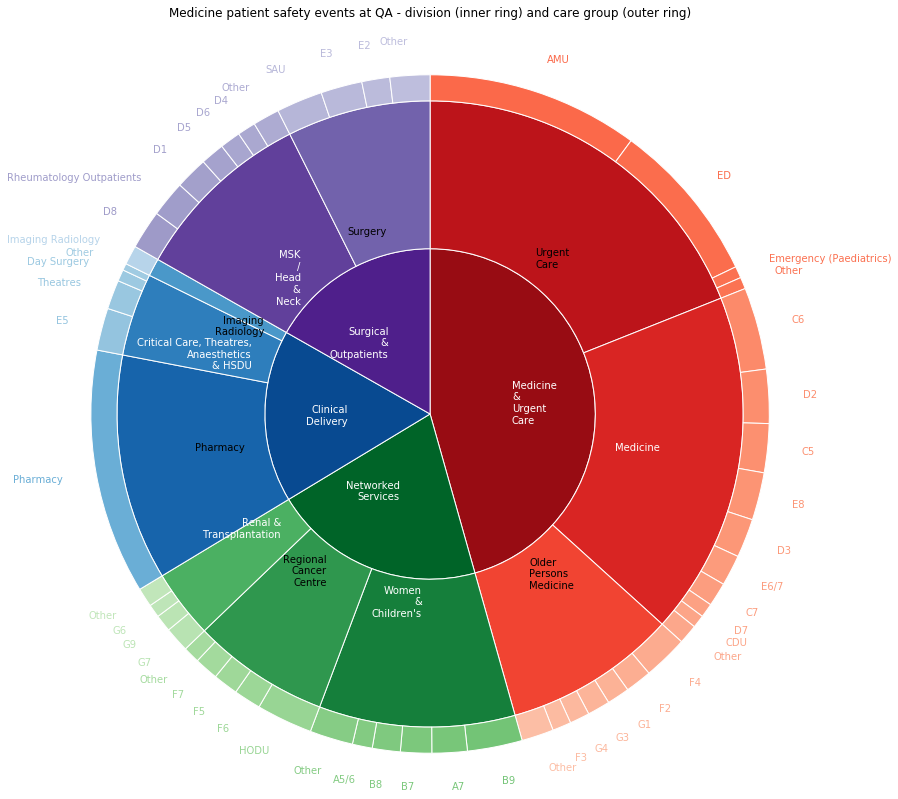

In [544]:
# Create colors
a, b, c, d, e =[plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]
a, c, d, e = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]

# First Ring (Inside)
fig, ax = plt.subplots()
ax.axis('equal')
division_labels_newlines = [i.replace(' ','\n') for i in division_labels]
#mypie, _ = ax.pie(division_counts, radius=2, labels=division_labels_newlines, labeldistance=0.6, colors=[a(0.9), b(0.9), c(0.9), d(0.9), e(0.9)], textprops={'color':'w'})
mypie, _ = ax.pie(division_counts, radius=1.9, labels=division_labels_newlines, labeldistance=0.5, colors=[a(0.9), c(0.9), d(0.9), e(0.9)], textprops={'color':'w'}, startangle=90, counterclock=False)
plt.setp( mypie, width=1.9, edgecolor='white')
 
# Second Ring (oUTside)
care_group_labels_newlines = [i.replace(' ','\n') for i in care_group_labels]
care_group_labels_newlines[care_group_labels_newlines.index('Renal\n&\nTransplantation')] = 'Renal &\nTransplantation'
care_group_labels_newlines[care_group_labels_newlines.index('Critical\nCare,\nTheatres,\nAnaesthetics\n&\nHSDU')] = 'Critical Care, Theatres,\nAnaesthetics\n& HSDU'
#care_group_labels_newlines[care_group_labels_newlines.index('Imaging\nRadiology')] = 'Imaging Radiology'
#care_group_colours = [a(0.8), a(0.7), a(0.6), a(0.5), b(0.8), c(0.8), c(0.7), c(0.6), d(0.8), d(0.7), d(0.6), e(0.8), e(0.7), e(0.6)]
care_group_colours = [a(0.8), a(0.7), a(0.6), c(0.8), c(0.7), c(0.6), d(0.8), d(0.7), d(0.6), e(0.8), e(0.7), e(0.6)]
mypie2, texts = ax.pie(care_group_counts, radius=3.6, labels=care_group_labels_newlines, labeldistance=0.6, colors=care_group_colours, textprops={'color':'k'},startangle=90, counterclock=False)
plt.setp( mypie2, width=1.7, edgecolor='white')
care_group_label_colours = ['k' if i%2==0 else 'w' for i in range(len(care_group_counts))]
for text, color in zip(texts, care_group_label_colours):
    text.set_color(color)
plt.margins(0,0)

# Third Ring (oUTside)
location_colours = [a(0.5),a(0.49),a(0.48),a(0.47),a(0.4),a(0.39),a(0.38),a(0.37),a(0.36),a(0.35),a(0.34),a(0.33),a(0.32),a(0.31),a(0.30),a(0.29),a(0.28),a(0.27),a(0.26),a(0.25),a(0.24),c(0.50),c(0.49),c(0.48),c(0.47),c(0.46),c(0.45),c(0.40),c(0.39),c(0.38),c(0.37),c(0.36),c(0.30),c(0.29),c(0.28),c(0.27),d(0.50),d(0.40),d(0.39),d(0.38),d(0.37),d(0.30),e(0.50),e(0.49),e(0.48),e(0.47),e(0.46),e(0.45),e(0.44),e(0.40),e(0.39),e(0.38),e(0.37)]
mypie3, texts = ax.pie(location_counts, radius=3.9, labels=location_labels, colors=location_colours, startangle=90, counterclock=False)
plt.setp( mypie3, width=0.3, edgecolor='white')
for text, color in zip(texts, location_colours):
    text.set_color(color)
plt.margins(0,0)

plt.title('Medicine patient safety events at QA - division (inner ring) and care group (outer ring)', y=2.3);